In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ISLP
import statsmodels.api as sm
import seaborn as sns
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [23]:
boston = ISLP.load_data("boston")

In [102]:
y = boston["crim"]
pred_dict_linear = {}
for predictor in boston.drop('crim', axis=1):
    design = design = MS([predictor])
    X = design.fit_transform(boston)
    model = sm.OLS(y, X)
    results = model.fit();
    pred_dict_linear[predictor] = (results.pvalues.iloc[1])
    sns.scatterplot(data=boston, x=predictor, y='crim', ax=axes[counter//4, counter%4])
    sns.lineplot(data = boston, x=predictor, y=results.predict(X), ax=axes[counter//4, counter%4], color="red", linestyle="dashed")


In [103]:
pred_dict_linear

{'zn': 5.506472107679336e-06,
 'indus': 1.4503489330272395e-21,
 'chas': 0.2094345015352004,
 'nox': 3.7517392603567345e-23,
 'rm': 6.346702984687838e-07,
 'age': 2.8548693502440745e-16,
 'dis': 8.519948766926204e-19,
 'rad': 2.6938443981863264e-56,
 'tax': 2.357126835256745e-47,
 'ptratio': 2.9429224473598156e-11,
 'lstat': 2.6542772314731968e-27,
 'medv': 1.1739870821943443e-19}

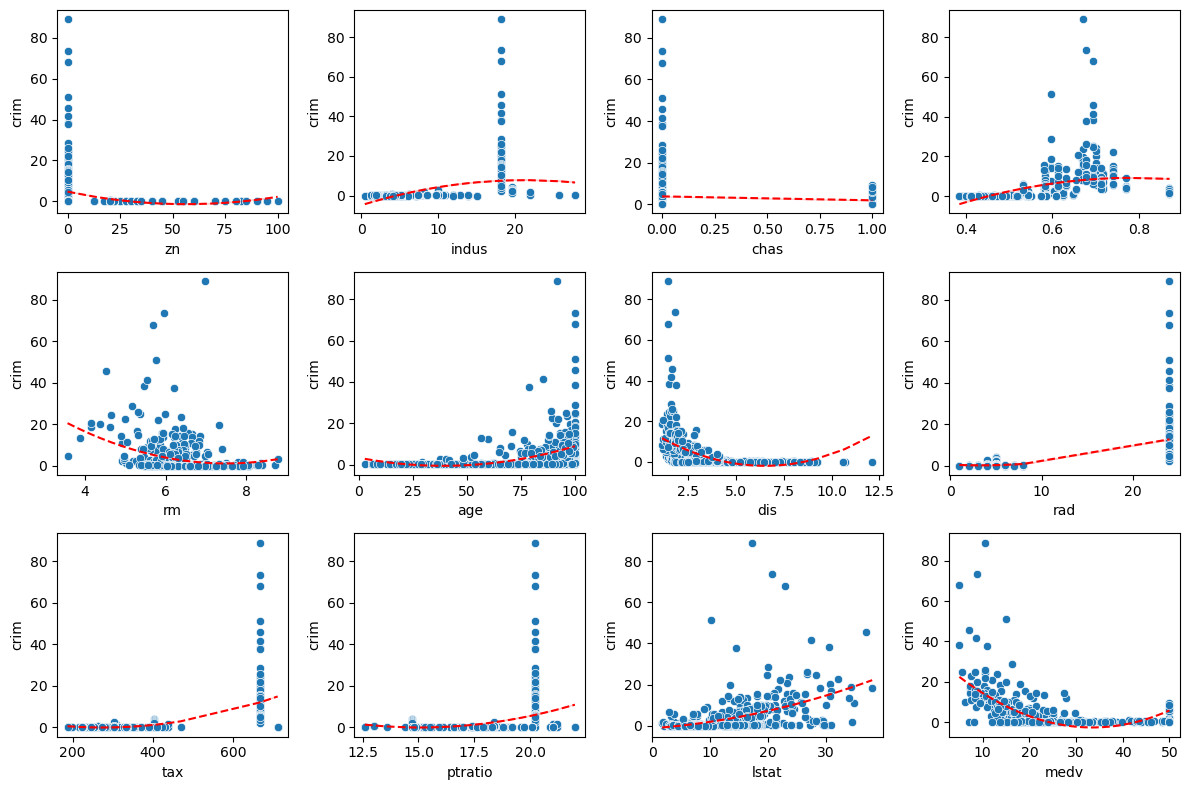

In [143]:
y = boston["crim"]
fig, axes = plt.subplots(3, 4, figsize=(12,8))
pred_dict_poly = {}
counter = 0
for predictor in boston.drop('crim', axis=1).columns:
    design = MS([poly(predictor, degree=2)])
    X = design.fit_transform(boston)
    model = sm.OLS(y, X)
    results = model.fit();
    pred_dict_poly[predictor] = (results.pvalues.iloc[1])
    sns.scatterplot(data=boston, x=predictor, y='crim', ax=axes[counter//4, counter%4])
    sns.lineplot(data = boston, x=predictor, y=results.predict(X), ax=axes[counter//4, counter%4], color="red", linestyle="dashed")
    counter += 1
fig.tight_layout()

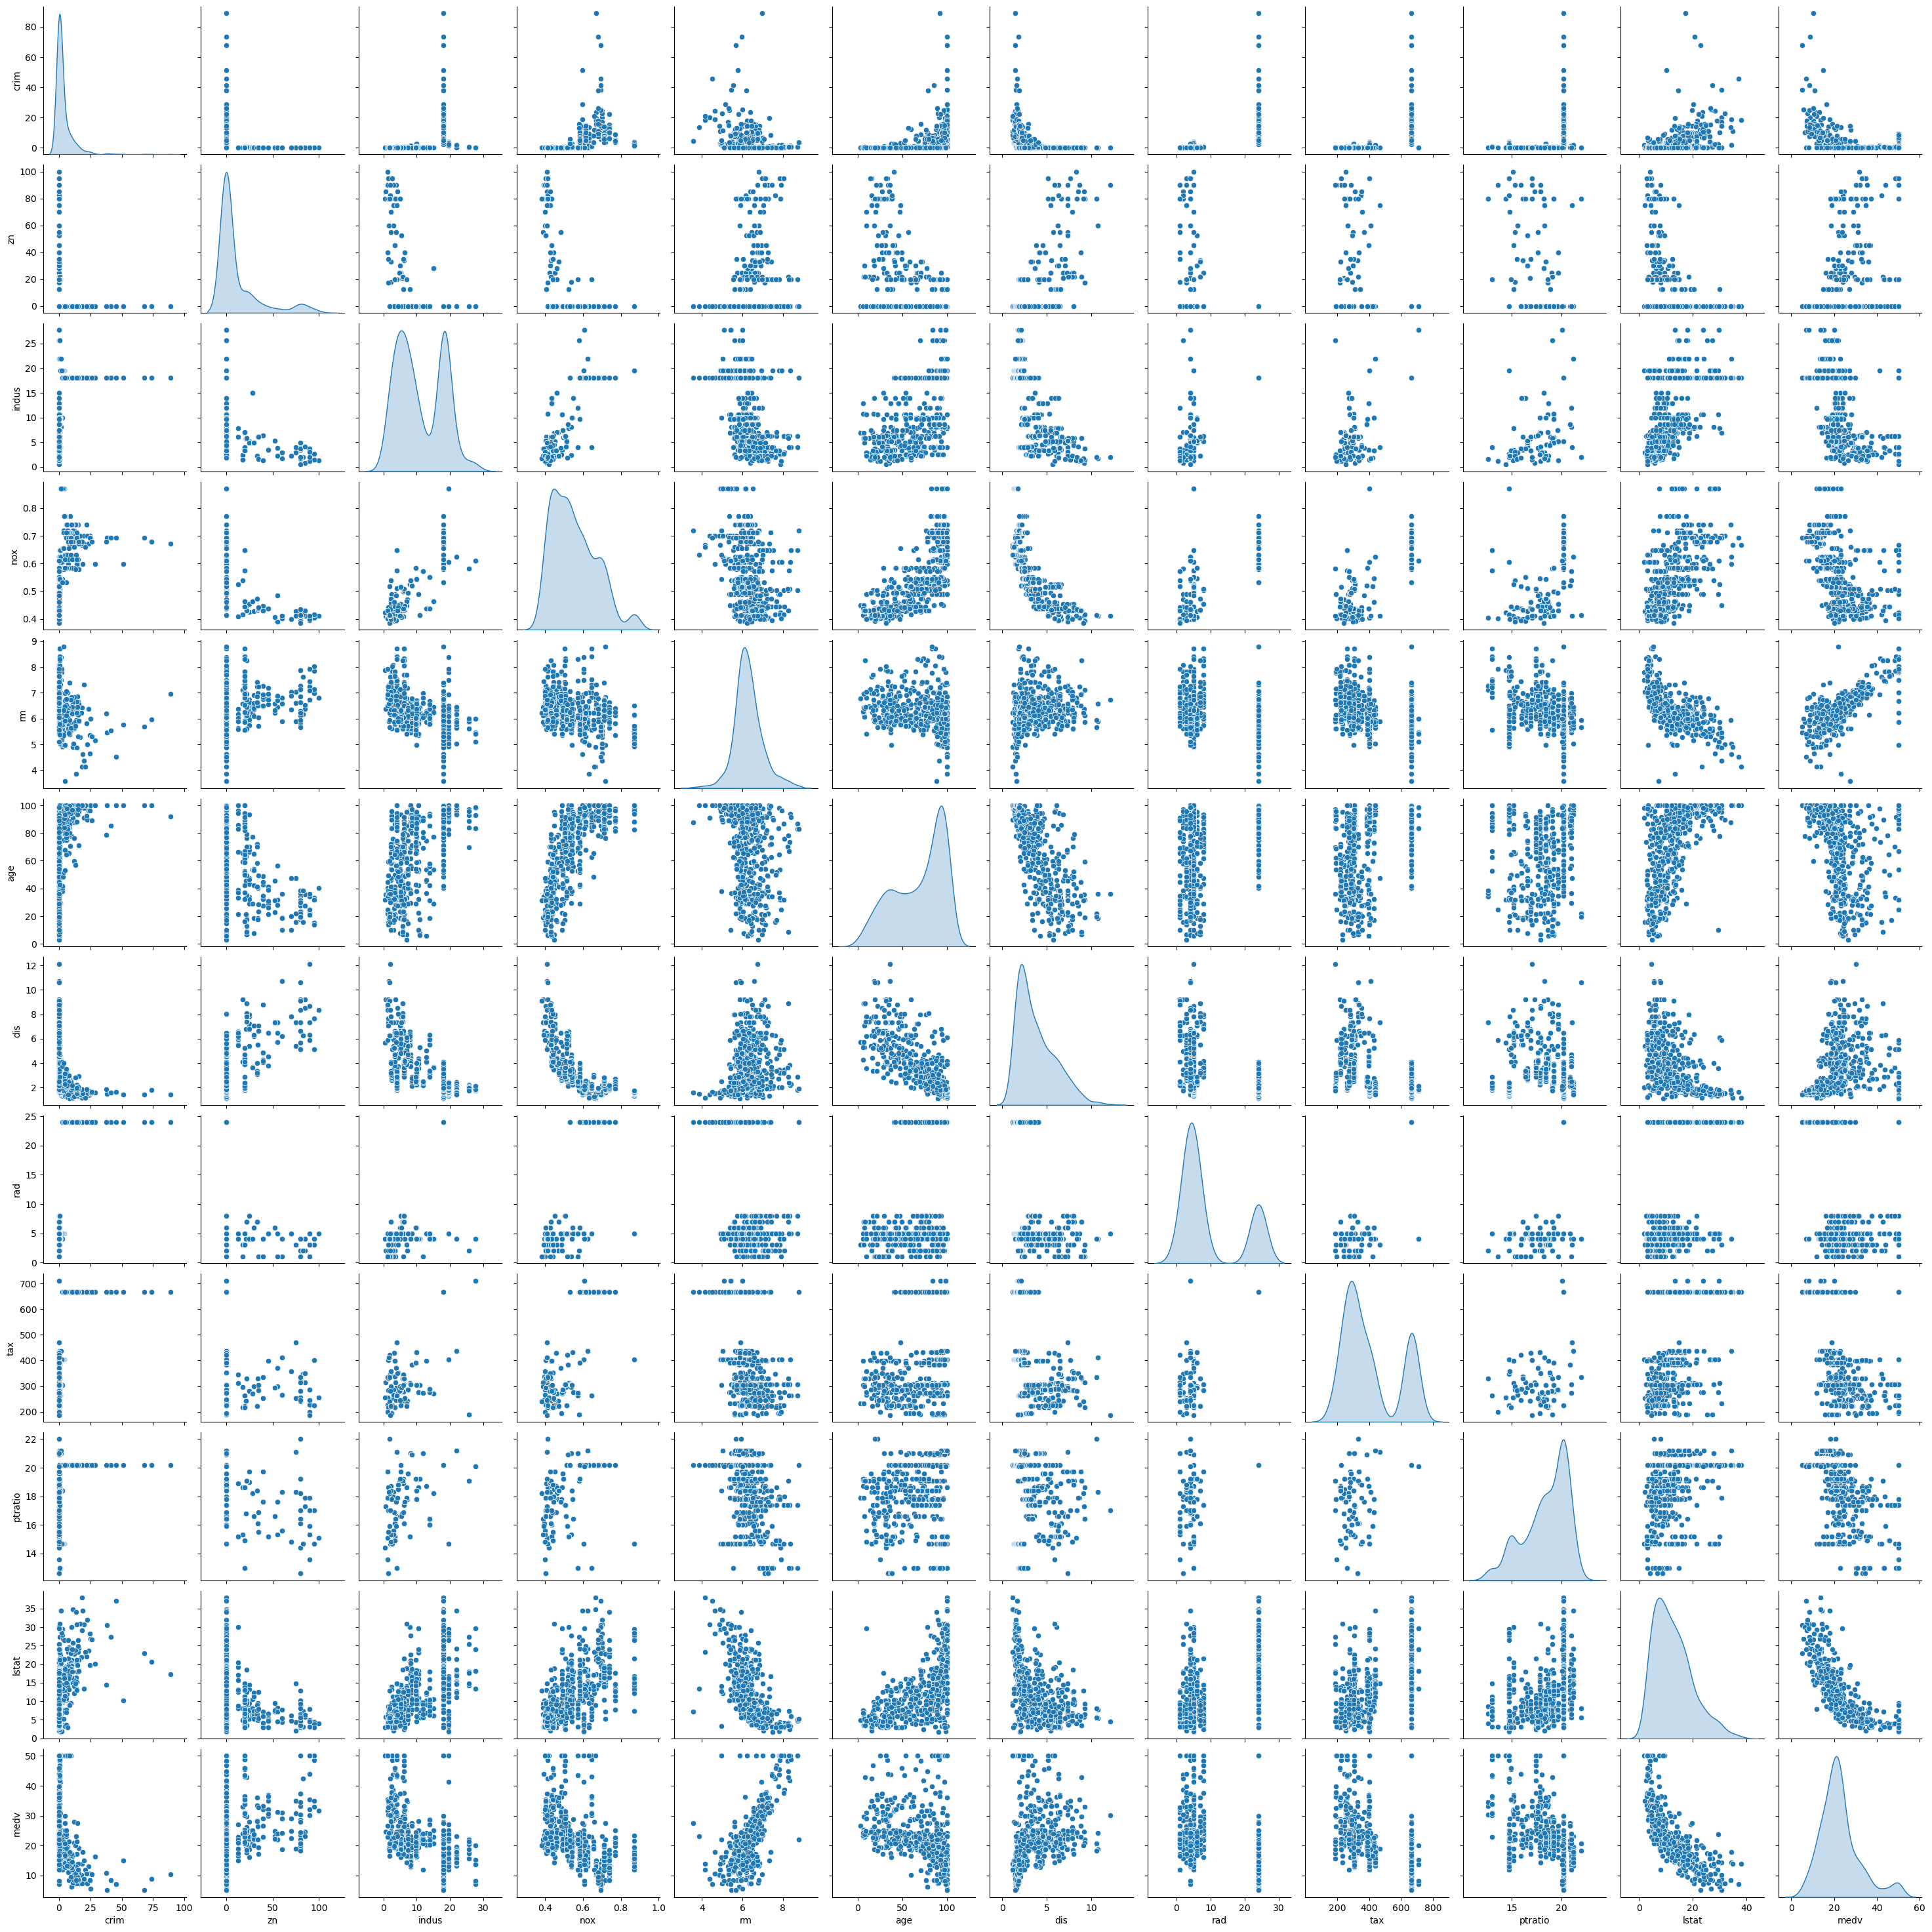

In [63]:
sns.pairplot(boston[significant], diag_kind="kde")

In [75]:
design = design = MS(boston.drop("crim", axis=1).columns)
X = design.fit_transform(boston)
model = sm.OLS(y, X)
results = model.fit();

In [76]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Fri, 29 Aug 2025   Prob (F-statistic):           2.03e-56
Time:                        21:32:15   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.7784      7.082      1.946      0.052      -0.136      27.693
zn             0.0457      0.019      2.433      0.015       0.009       0.083
indus         -0.0584      0.084     -0.698      0.486      -0.223       0.106
chas          -0.8254      1.183     -0.697      0.486      -3.150       1.500
nox           -9.9576      5.290     -1.882      0.060     -20.351       0.436
rm             0.6289      0.607      1.036      0.301      -0.564       1.822
age           -0.0008      0.018     -0.047      0.962      -0.036       0.034
dis           -1.0122      0.282     -3.584      0.000      -1.567      -0.457
rad            0.6125      0.088      6.997      0.000       0.440       0.784
tax           -0.0038      0.005     -0.730      0.466      -0.014       0.006
ptratio       -0.3041      0.186     -1.632      0.103      -0.670       0.062
lstat          0.1388      0.076      1.833      0.067      -0.010       0.288
medv          -0.2201      0.060     -3.678      0.000      -0.338      -0.103
==============================================================================
Omnibus:                      663.436   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80856.852
Skew:                           6.579   Prob(JB):                         0.00
Kurtosis:                      63.514   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""